## Homework #5, Problem 6.1
Use simple fixed-point iteration to locate the root of the function:
$$f(x)=sin(\sqrt{x})-x$$
I'll be using an initial guess of $x_0=0.5$, and iterating until there is less than a 0.01% error. I'll be using a g(x) of...
$$x_{i+1}=sin(\sqrt{x})$$

In [1]:
import numpy as np
# np.set_printoptions(precision = 25)
import matplotlib.pyplot as plt

# Given the provided function, perform fixed-point iteration to find the root
# Stops at the provided # of iterations, or when error is less than the margin
def fix_pt_iter(func, start_x, error_margin=0.0001, max_iter=1000):
    x_vals  = [start_x] # x_vals is list of guesses
    error   = [1.00]    # Start at 100% error
    iters   = 0
    while error[-1] >= error_margin and iters <= max_iter:
        x_vals.append(func(x_vals[-1])) # Calculate guess, next x_i
        iters = iters + 1               # Increment counter
        error.append((x_vals[-1]-x_vals[-2])/x_vals[-1] if x_vals[-1] is not 0 else 1)
        
    return (x_vals, error, iters)   # Return root list, error list, # iterations

Root (after 9 iterations): 0.768606231313010


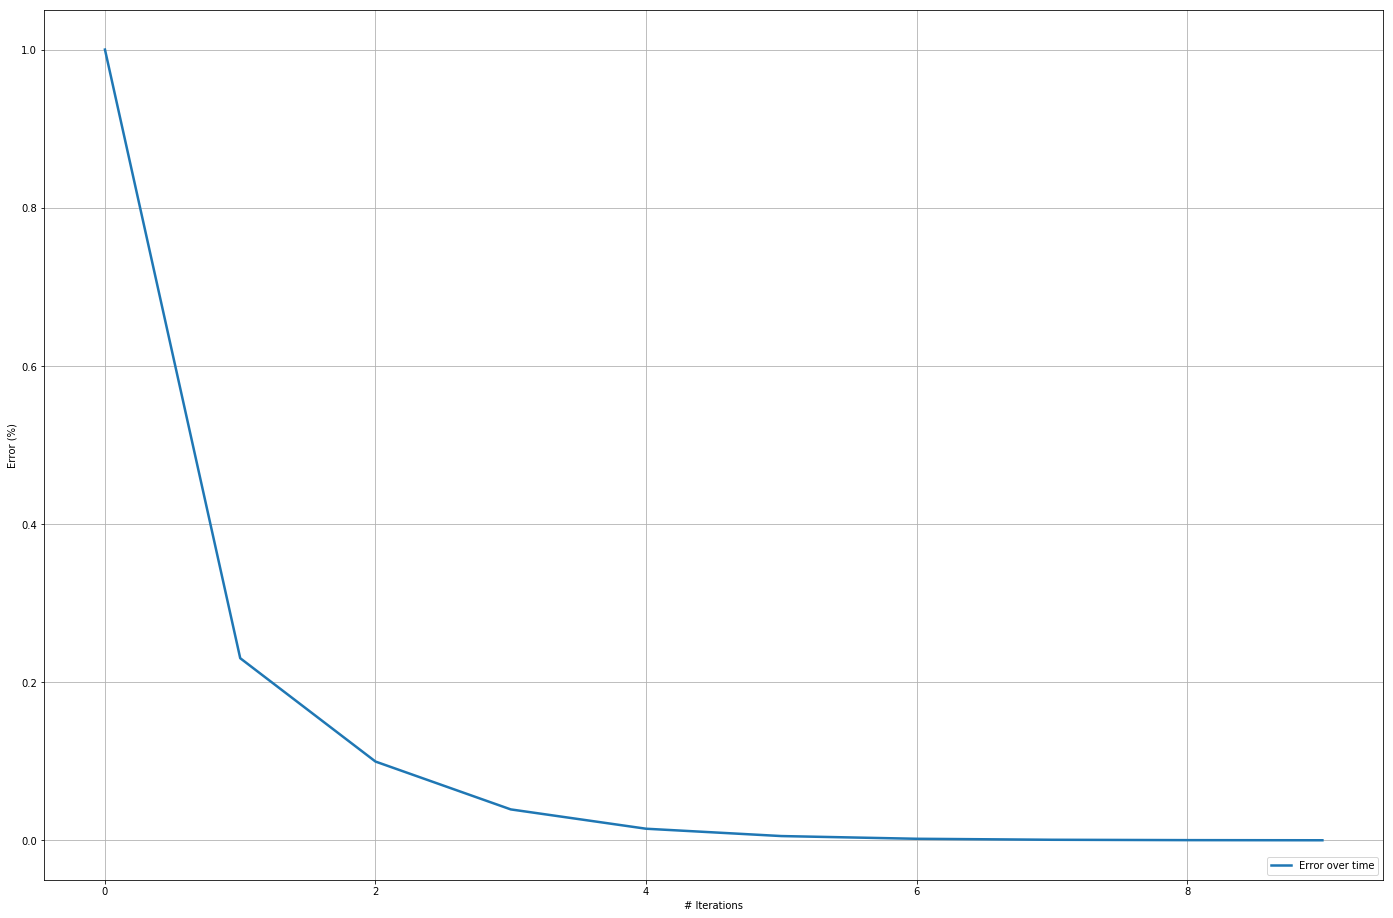

In [2]:
# Guessing function for x_i+1
def g(x):
    return (np.sin(np.sqrt(x)))

root_list, err_list, num_iters = fix_pt_iter(g, 0.5, error_margin=.0001)
x = np.arange(num_iters + 1)

print("Root (after %i iterations): {0:.15f}".format(root_list[-1]) % num_iters)
plt.figure(figsize=(24, 16))
plt.plot(x, np.asarray(err_list), label="Error over time", linewidth = 2.5)
plt.ylabel("Error (%)")
plt.xlabel("# Iterations")
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

## Conclusion
Using fixed-point iteration with an initial guess of $x_0=0.5$, this algorithm found the root of $f(x)$ to be 0.7686488567609, compared to the real root of 0.768648856760949..., which is **nearly** identical (accurate up to 12 significant figures). As shown in the graph above, this process is linearly convergent, because as more iterations were performed, the error in each sequential step _decreased_, and was roughly proportional to the error of the previous step.